In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
ball_scan_dev = pd.DataFrame({"Number of Scans":[],"Maximum Deviation":[], "Mean Deviation":[]})
for i in range(1,21):
    filename = "ball result/Ball " + str(i) + " scans.pickle"
    infile = open(filename,'rb')
    scan_i = pickle.load(infile)
    max_dev = scan_i["Maximum Deviation"].values
    mean_dev = scan_i["Mean Deviation"].values
    infile.close()
    this_loop = pd.DataFrame({"Number of Scans":[i for j in range(len(max_dev))],"Maximum Deviation":max_dev,"Mean Deviation": mean_dev})
    ball_scan_dev = ball_scan_dev.append(this_loop)

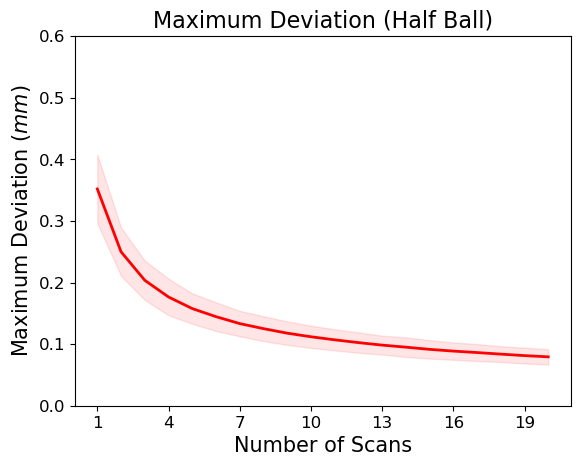

In [65]:
plt.style.use("default")

g = sns.lineplot(x="Number of Scans", y="Maximum Deviation", color="red",
                  data=ball_scan_dev,ci=None, linewidth=2)

# bounds = ball_scan_dev.groupby('Number of Scans')['Maximum Deviation'].quantile((0,1)).unstack()
upper_bounds = ball_scan_dev.groupby('Number of Scans')['Maximum Deviation'].mean() + 2* ball_scan_dev.groupby('Number of Scans')['Maximum Deviation'].std()
lower_bounds = ball_scan_dev.groupby('Number of Scans')['Maximum Deviation'].mean() - 2* ball_scan_dev.groupby('Number of Scans')['Maximum Deviation'].std()

g.fill_between(x=bounds.index,y1=upper_bounds,y2=lower_bounds,alpha=0.1, color="red")

plt.title('Maximum Deviation (Half Ball)',fontsize=16)

plt.xticks(np.arange(1, 21, step=3), fontsize=12)
plt.yticks(np.arange(0, 0.61, step=0.1), fontsize=12)

plt.xlabel("Number of Scans", fontsize=15)
plt.ylabel("Maximum Deviation ($mm$)", fontsize=15)

plt.savefig("Maximum Deviation Plot (Half Ball).png", dpi=600)

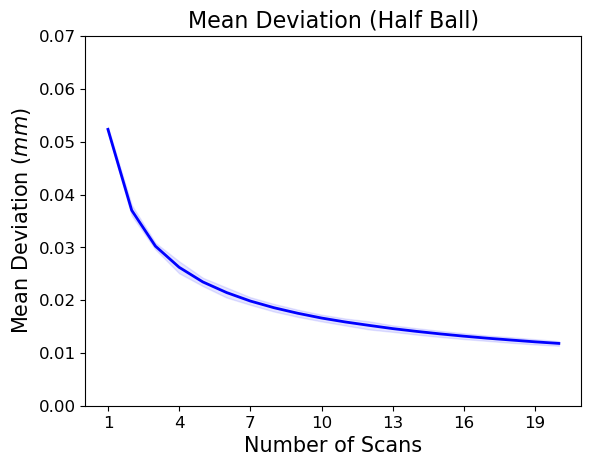

In [69]:
plt.style.use("default")

g = sns.lineplot(x="Number of Scans", y="Mean Deviation", estimator = np.mean, color="blue",
                  data=ball_scan_dev,ci=None, linewidth=2)

# bounds = ball_scan_dev.groupby('Number of Scans')['Mean Deviation'].quantile((0.025,0.975)).unstack()

upper_bounds = ball_scan_dev.groupby('Number of Scans')['Mean Deviation'].mean() + 2* ball_scan_dev.groupby('Number of Scans')['Mean Deviation'].std()
lower_bounds = ball_scan_dev.groupby('Number of Scans')['Mean Deviation'].mean() - 2* ball_scan_dev.groupby('Number of Scans')['Mean Deviation'].std()

g.fill_between(x=bounds.index,y1=upper_bounds,y2=lower_bounds,alpha=0.1, color="blue")

plt.title('Mean Deviation (Half Ball)',fontsize=16)


plt.xticks(np.arange(1, 21, step=3), fontsize=12)
plt.yticks(np.arange(0, 0.07, step=0.01), fontsize=12)

plt.xlabel("Number of Scans", fontsize=15)
plt.ylabel("Mean Deviation ($mm$)", fontsize=15)

plt.savefig("Mean Deviation Plot (Half Ball).png", dpi=600)

In [23]:
mean_max = pd.DataFrame({"Object":[],"Maximum Deviation":[],"Number of Scans":[]})
std_max = pd.DataFrame({"Object":[],"Maximum Deviation":[],"Number of Scans":[]})
for i in range(1,20):
    
    a = np.mean(ball_scan_dev[ball_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_a = pd.DataFrame({"Object":["Ball"],"Maximum Deviation":[a],"Number of Scans":[i]})
    mean_max = mean_max.append(max_a)
    b = np.std(ball_scan_dev[ball_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_b = pd.DataFrame({"Object":["Ball"],"Maximum Deviation":[b],"Number of Scans":[i]})
    std_max = std_max.append(max_b)

In [24]:

mean_mean = pd.DataFrame({"Object":[],"Mean Deviation":[],"Number of Scans":[]})
std_mean = pd.DataFrame({"Object":[],"Mean Deviation":[],"Number of Scans":[]})
for i in range(1,20):
    a = np.mean(ball_scan_dev[ball_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_a = pd.DataFrame({"Object":["Ball"],"Mean Deviation":[a],"Number of Scans":[i]})
    mean_mean = mean_mean.append(mean_a)
    b = np.std(ball_scan_dev[ball_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_b = pd.DataFrame({"Object":["Ball"],"Mean Deviation":[b],"Number of Scans":[i]})
    std_mean = std_mean.append(mean_b)

In [25]:
convex_scan_dev = pd.DataFrame({"Number of Scans":[],"Maximum Deviation":[], "Mean Deviation":[]})

for i in range(1,21):
    filename = "convex result/Convex " + str(i) + " scans.pickle"
    infile = open(filename,'rb')
    scan_i = pickle.load(infile)
    max_dev = scan_i["Maximum Deviation"].values
    mean_dev = scan_i["Mean Deviation"].values
    infile.close()
    this_loop = pd.DataFrame({"Number of Scans":[i for j in range(len(max_dev))],"Maximum Deviation":max_dev,"Mean Deviation": mean_dev})
    convex_scan_dev = convex_scan_dev.append(this_loop)
 

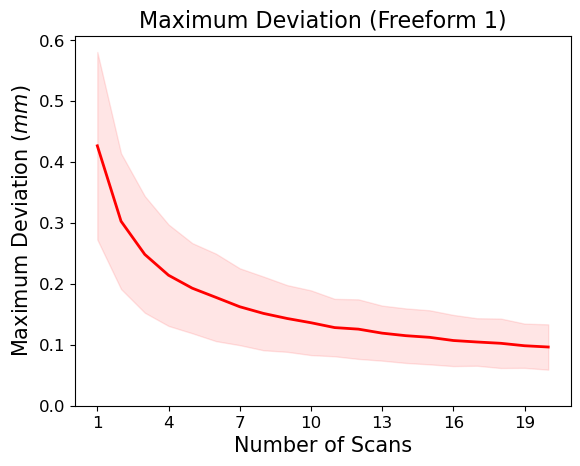

In [63]:
plt.style.use("default")

g = sns.lineplot(x="Number of Scans", y="Maximum Deviation", estimator = np.mean, color="red",
                  data=convex_scan_dev,ci=None, linewidth=2)

# bounds = convex_scan_dev.groupby('Number of Scans')['Maximum Deviation'].quantile((0.05,0.95)).unstack()

upper_bounds = convex_scan_dev.groupby('Number of Scans')['Maximum Deviation'].mean() + 2* convex_scan_dev.groupby('Number of Scans')['Maximum Deviation'].std()
lower_bounds = convex_scan_dev.groupby('Number of Scans')['Maximum Deviation'].mean() - 2* convex_scan_dev.groupby('Number of Scans')['Maximum Deviation'].std()

g.fill_between(x=bounds.index,y1=upper_bounds,y2=lower_bounds,alpha=0.1, color="red")

plt.title('Maximum Deviation (Freeform 1)',fontsize=16)

plt.xticks(np.arange(1, 21, step=3), fontsize=12)
plt.yticks(np.arange(0, 0.61, step=0.1), fontsize=12)

plt.xlabel("Number of Scans", fontsize=15)
plt.ylabel("Maximum Deviation ($mm$)", fontsize=15)

plt.savefig("Maximum Deviation Plot (Freeform 1).png", dpi=600)

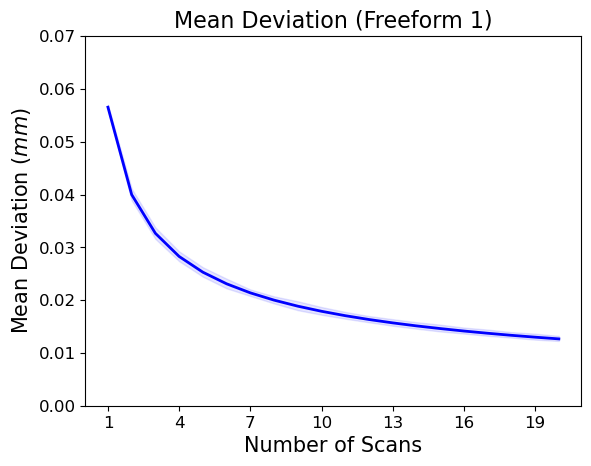

In [67]:
plt.style.use("default")

g = sns.lineplot(x="Number of Scans", y="Mean Deviation", estimator = np.median, color="blue",
                  data=convex_scan_dev,ci=None, linewidth=2)

# bounds = convex_scan_dev.groupby('Number of Scans')['Mean Deviation'].quantile((0.05,0.95)).unstack()

upper_bounds = convex_scan_dev.groupby('Number of Scans')['Mean Deviation'].mean() + 2* convex_scan_dev.groupby('Number of Scans')['Mean Deviation'].std()
lower_bounds = convex_scan_dev.groupby('Number of Scans')['Mean Deviation'].mean() - 2* convex_scan_dev.groupby('Number of Scans')['Mean Deviation'].std()

g.fill_between(x=bounds.index,y1=upper_bounds,y2=lower_bounds,alpha=0.1, color="blue")

plt.title('Mean Deviation (Freeform 1)',fontsize=16)

plt.xticks(np.arange(1, 21, step=3), fontsize=12)
plt.yticks(np.arange(0, 0.07, step=0.01), fontsize=12)

plt.xlabel("Number of Scans", fontsize=15)
plt.ylabel("Mean Deviation ($mm$)", fontsize=15)

plt.savefig("Mean Deviation Plot (Freeform 1).png", dpi=600)

In [28]:
mean_max = pd.DataFrame({"Object":[],"Maximum Deviation":[],"Number of Scans":[]})
std_max = pd.DataFrame({"Object":[],"Maximum Deviation":[],"Number of Scans":[]})
for i in range(1,20):
    
    a = np.mean(ball_scan_dev[ball_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_a = pd.DataFrame({"Object":["Ball"],"Maximum Deviation":[a],"Number of Scans":[i]})
    mean_max = mean_max.append(max_a)
    b = np.std(ball_scan_dev[ball_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_b = pd.DataFrame({"Object":["Ball"],"Maximum Deviation":[b],"Number of Scans":[i]})
    std_max = std_max.append(max_b)
    
mean_mean = pd.DataFrame({"Object":[],"Mean Deviation":[],"Number of Scans":[]})
std_mean = pd.DataFrame({"Object":[],"Mean Deviation":[],"Number of Scans":[]})
for i in range(1,20):
    a = np.mean(ball_scan_dev[ball_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_a = pd.DataFrame({"Object":["Ball"],"Mean Deviation":[a],"Number of Scans":[i]})
    mean_mean = mean_mean.append(mean_a)
    b = np.std(ball_scan_dev[ball_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_b = pd.DataFrame({"Object":["Ball"],"Mean Deviation":[b],"Number of Scans":[i]})
    std_mean = std_mean.append(mean_b)

In [29]:
for i in range(1,20):
    
    a = np.mean(convex_scan_dev[convex_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_a = pd.DataFrame({"Object":["Freeform 1"],"Maximum Deviation":[a],"Number of Scans":[i]})
    mean_max = mean_max.append(max_a)
    b = np.std(convex_scan_dev[convex_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_b = pd.DataFrame({"Object":["Freeform 1"],"Maximum Deviation":[b],"Number of Scans":[i]})
    std_max = std_max.append(max_b)
    

for i in range(1,20):
    a = np.mean(convex_scan_dev[convex_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_a = pd.DataFrame({"Object":["Freeform 1"],"Mean Deviation":[a],"Number of Scans":[i]})
    mean_mean = mean_mean.append(mean_a)
    b = np.std(convex_scan_dev[convex_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_b = pd.DataFrame({"Object":["Freeform 1"],"Mean Deviation":[b],"Number of Scans":[i]})
    std_mean = std_mean.append(mean_b)

In [30]:
freeform_scan_dev = pd.DataFrame({"Number of Scans":[],"Maximum Deviation":[], "Mean Deviation":[]})

for i in range(1,21):
    filename = "freeform result/Freeform " + str(i) + " scans.pickle"
    infile = open(filename,'rb')
    scan_i = pickle.load(infile)
    max_dev = scan_i["Maximum Deviation"].values
    mean_dev = scan_i["Mean Deviation"].values
    infile.close()
    this_loop = pd.DataFrame({"Number of Scans":[i for j in range(len(max_dev))],"Maximum Deviation":max_dev,"Mean Deviation": mean_dev})
    freeform_scan_dev = freeform_scan_dev.append(this_loop)
 

In [31]:
for i in range(1,20):
    
    a = np.mean(freeform_scan_dev[freeform_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_a = pd.DataFrame({"Object":["Freeform 2"],"Maximum Deviation":[a],"Number of Scans":[i]})
    mean_max = mean_max.append(max_a)
    b = np.std(freeform_scan_dev[freeform_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_b = pd.DataFrame({"Object":["Freeform 2"],"Maximum Deviation":[b],"Number of Scans":[i]})
    std_max = std_max.append(max_b)
    

for i in range(1,20):
    a = np.mean(freeform_scan_dev[freeform_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_a = pd.DataFrame({"Object":["Freeform 2"],"Mean Deviation":[a],"Number of Scans":[i]})
    mean_mean = mean_mean.append(mean_a)
    b = np.std(freeform_scan_dev[freeform_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_b = pd.DataFrame({"Object":["Freeform 2"],"Mean Deviation":[b],"Number of Scans":[i]})
    std_mean = std_mean.append(mean_b)

In [32]:
freeform_2_scan_dev = pd.DataFrame({"Number of Scans":[],"Maximum Deviation":[], "Mean Deviation":[]})

for i in range(1,21):
    filename = "freeform 2 result/Freeform 2 " + str(i) + " scans.pickle"
    infile = open(filename,'rb')
    scan_i = pickle.load(infile)
    max_dev = scan_i["Maximum Deviation"].values
    mean_dev = scan_i["Mean Deviation"].values
    infile.close()
    this_loop = pd.DataFrame({"Number of Scans":[i for j in range(len(max_dev))],"Maximum Deviation":max_dev,"Mean Deviation": mean_dev})
    freeform_2_scan_dev = freeform_2_scan_dev.append(this_loop)
 

In [33]:

for i in range(1,20):
    
    a = np.mean(freeform_2_scan_dev[freeform_2_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_a = pd.DataFrame({"Object":["Freeform 3"],"Maximum Deviation":[a],"Number of Scans":[i]})
    mean_max = mean_max.append(max_a)
    b = np.std(freeform_2_scan_dev[freeform_2_scan_dev['Number of Scans']==i]['Maximum Deviation'])
    max_b = pd.DataFrame({"Object":["Freeform 3"],"Maximum Deviation":[b],"Number of Scans":[i]})
    std_max = std_max.append(max_b)
    

for i in range(1,20):
    a = np.mean(freeform_2_scan_dev[freeform_2_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_a = pd.DataFrame({"Object":["Freeform 3"],"Mean Deviation":[a],"Number of Scans":[i]})
    mean_mean = mean_mean.append(mean_a)
    b = np.std(freeform_2_scan_dev[freeform_2_scan_dev['Number of Scans']==i]['Mean Deviation'])
    mean_b = pd.DataFrame({"Object":["Freeform 3"],"Mean Deviation":[b],"Number of Scans":[i]})
    std_mean = std_mean.append(mean_b)

C:\Users\zhaoh\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


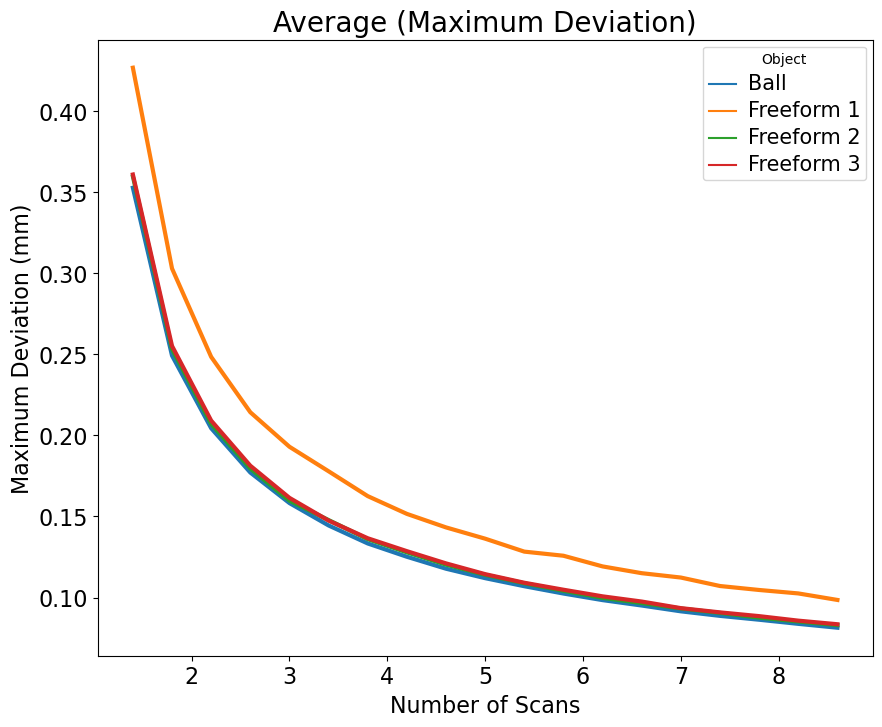

In [106]:
plt.figure(figsize=[10,8])
plt1 = sns.lineplot(x="Number of Scans", y="Maximum Deviation", hue="Object", data=mean_max, linewidth=3)
plt1.set_title('Average (Maximum Deviation)',fontsize=20);
plt1.xaxis.set_label_text('Number of Scans',fontsize=16);
plt1.yaxis.set_label_text('Maximum Deviation (mm)',fontsize=16);
plt.setp(plt1.get_legend().get_texts(), fontsize=15)
plt1.set_xticklabels(range(1,21));
plt1.tick_params(labelsize=16);
# plt1.set(ylim=(0.008,0.062));
plt.savefig("Maximum Deviation Plot.png", dpi=600)

In [43]:
mean_max.to_csv('mean_max.csv',index=False)

C:\Users\zhaoh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


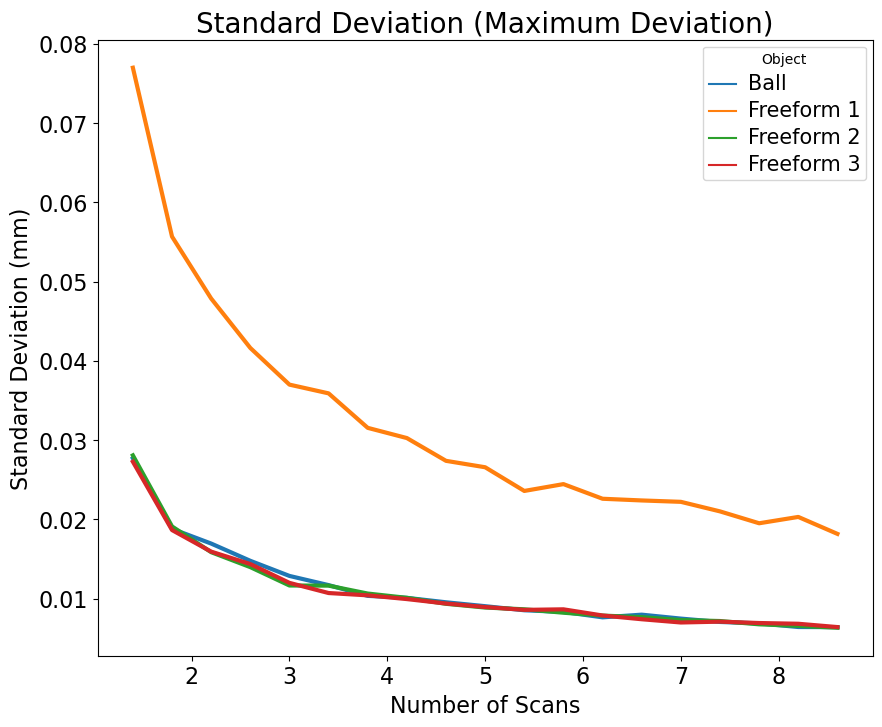

In [102]:
plt.figure(figsize=[10,8])
plt1 = sns.lineplot(x="Number of Scans", y="Maximum Deviation", hue="Object", data=std_max, linewidth=3)
plt1.set_title('Standard Deviation (Maximum Deviation)',fontsize=20);
plt1.xaxis.set_label_text('Number of Scans',fontsize=16);
plt1.yaxis.set_label_text('Standard Deviation (mm)',fontsize=16);
plt.setp(plt1.get_legend().get_texts(), fontsize=15)

plt1.set_xticklabels(range(1,21));
plt1.tick_params(labelsize=16);
# plt1.set(ylim=(0.008,0.062));
plt.savefig("Maximum Deviation sd Plot.png", dpi=600)

C:\Users\zhaoh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


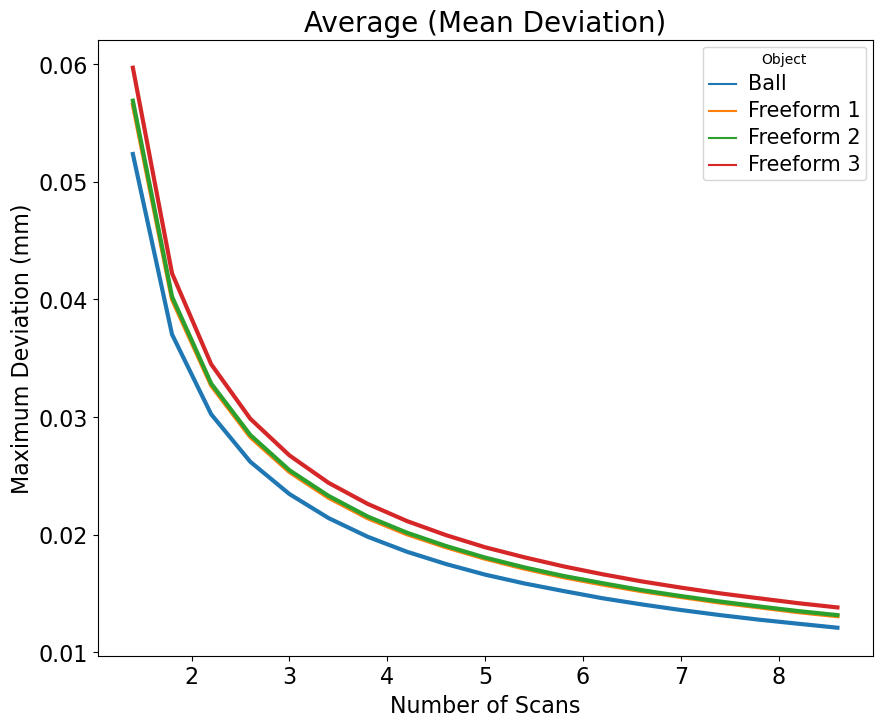

In [104]:
plt.figure(figsize=[10,8])
plt1 = sns.lineplot(x="Number of Scans", y="Mean Deviation", hue="Object", data=mean_mean, linewidth=3)
plt1.set_title('Average (Mean Deviation)',fontsize=20);
plt1.xaxis.set_label_text('Number of Scans',fontsize=16);
plt1.yaxis.set_label_text('Maximum Deviation (mm)',fontsize=16);
plt.setp(plt1.get_legend().get_texts(), fontsize=15)

plt1.set_xticklabels(range(1,21));
plt1.tick_params(labelsize=16);
# plt1.set(ylim=(0.008,0.062));
plt.savefig("Mean Deviation Plot.png", dpi=600)

In [46]:
mean_mean.to_csv("mean mean.csv",index=False)

C:\Users\zhaoh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


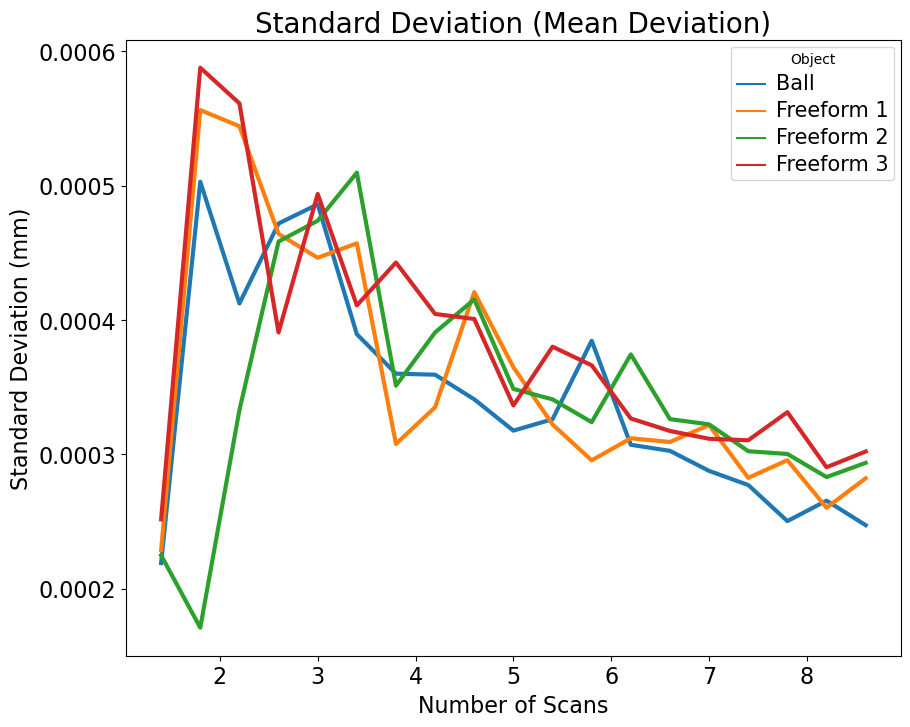

In [105]:
plt.figure(figsize=[10,8])
plt1 = sns.lineplot(x="Number of Scans", y="Mean Deviation", hue="Object", data=std_mean, linewidth=3)
plt1.set_title('Standard Deviation (Mean Deviation)',fontsize=20);
plt1.xaxis.set_label_text('Number of Scans',fontsize=16);
plt1.yaxis.set_label_text('Standard Deviation (mm)',fontsize=16);
plt.setp(plt1.get_legend().get_texts(), fontsize=15)

plt1.set_xticklabels(range(1,21));
plt1.tick_params(labelsize=16);
# plt1.set(ylim=(0.008,0.062));
plt.savefig("Mean Deviation sd Plot.png", dpi=600)

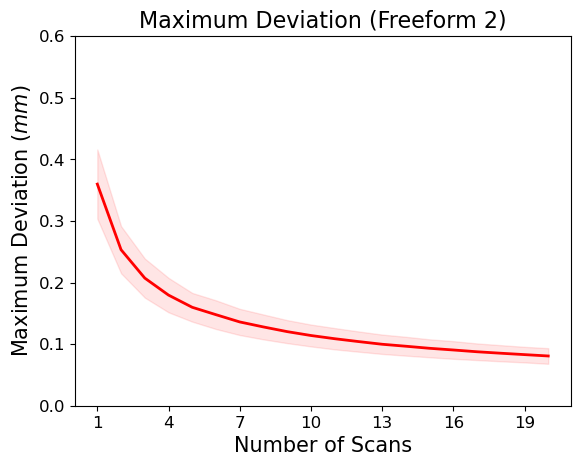

In [60]:
plt.style.use("default")

g = sns.lineplot(x="Number of Scans", y="Maximum Deviation", estimator = np.mean, color="red",
                  data=freeform_scan_dev,ci=None, linewidth=2)

# bounds = freeform_scan_dev.groupby('Number of Scans')['Maximum Deviation'].quantile((0,1)).unstack()

upper_bounds = freeform_scan_dev.groupby('Number of Scans')['Maximum Deviation'].mean() + 2* freeform_scan_dev.groupby('Number of Scans')['Maximum Deviation'].std()
lower_bounds = freeform_scan_dev.groupby('Number of Scans')['Maximum Deviation'].mean() - 2* freeform_scan_dev.groupby('Number of Scans')['Maximum Deviation'].std()

g.fill_between(x=bounds.index,y1=upper_bounds,y2=lower_bounds,alpha=0.1, color="red")

plt.title('Maximum Deviation (Freeform 2)',fontsize=16)

plt.xticks(np.arange(1, 21, step=3), fontsize=12)
plt.yticks(np.arange(0, 0.61, step=0.1), fontsize=12)

plt.xlabel("Number of Scans", fontsize=15)
plt.ylabel("Maximum Deviation ($mm$)", fontsize=15)

plt.savefig("Maximum Deviation Plot (Freeform 2).png", dpi=600)

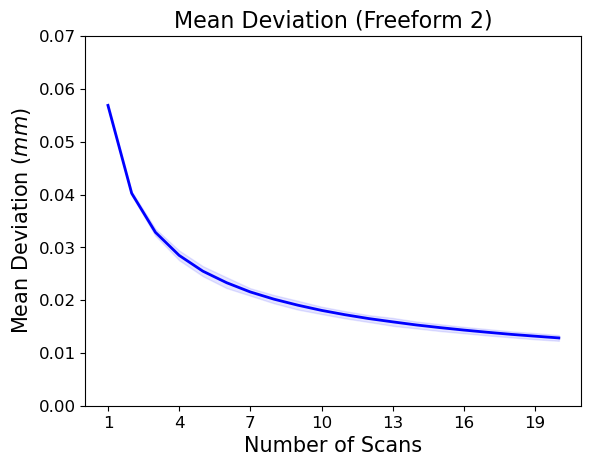

In [56]:
plt.style.use("default")

g = sns.lineplot(x="Number of Scans", y="Mean Deviation", estimator = np.mean, color="blue",
                  data=freeform_scan_dev,ci=None, linewidth=2)

# bounds = freeform_scan_dev.groupby('Number of Scans')['Mean Deviation'].quantile((0,1)).unstack()

upper_bounds = freeform_scan_dev.groupby('Number of Scans')['Mean Deviation'].mean() + 2* freeform_scan_dev.groupby('Number of Scans')['Mean Deviation'].std()
lower_bounds = freeform_scan_dev.groupby('Number of Scans')['Mean Deviation'].mean() - 2* freeform_scan_dev.groupby('Number of Scans')['Mean Deviation'].std()

g.fill_between(x=bounds.index,y1=upper_bounds,y2=lower_bounds,alpha=0.1, color="blue")

plt.title('Mean Deviation (Freeform 2)',fontsize=16)

plt.xticks(np.arange(1, 21, step=3), fontsize=12)
plt.yticks(np.arange(0, 0.07, step=0.01), fontsize=12)

plt.xlabel("Number of Scans", fontsize=15)
plt.ylabel("Mean Deviation ($mm$)", fontsize=15)

plt.savefig("Mean Deviation Plot (Freeform 2).png", dpi=600)

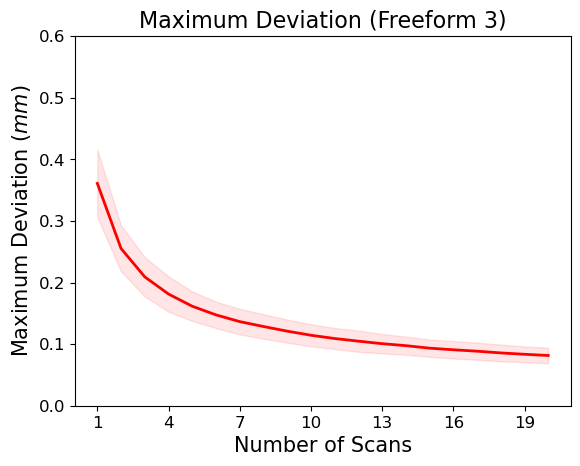

In [58]:
plt.style.use("default")

g = sns.lineplot(x="Number of Scans", y="Maximum Deviation", estimator = np.mean, color="red",
                  data=freeform_2_scan_dev,ci=None, linewidth=2)

# bounds = freeform_2_scan_dev.groupby('Number of Scans')['Maximum Deviation'].quantile((0,1)).unstack()

upper_bounds = freeform_2_scan_dev.groupby('Number of Scans')['Maximum Deviation'].mean() + 2* freeform_2_scan_dev.groupby('Number of Scans')['Maximum Deviation'].std()
lower_bounds = freeform_2_scan_dev.groupby('Number of Scans')['Maximum Deviation'].mean() - 2* freeform_2_scan_dev.groupby('Number of Scans')['Maximum Deviation'].std()

g.fill_between(x=bounds.index,y1=upper_bounds,y2=lower_bounds,alpha=0.1, color="red")

plt.title('Maximum Deviation (Freeform 3)',fontsize=16)

plt.xticks(np.arange(1, 21, step=3), fontsize=12)
plt.yticks(np.arange(0, 0.61, step=0.1), fontsize=12)

plt.xlabel("Number of Scans", fontsize=15)
plt.ylabel("Maximum Deviation ($mm$)", fontsize=15)

plt.savefig("Maximum Deviation Plot (Freeform 3).png", dpi=600)

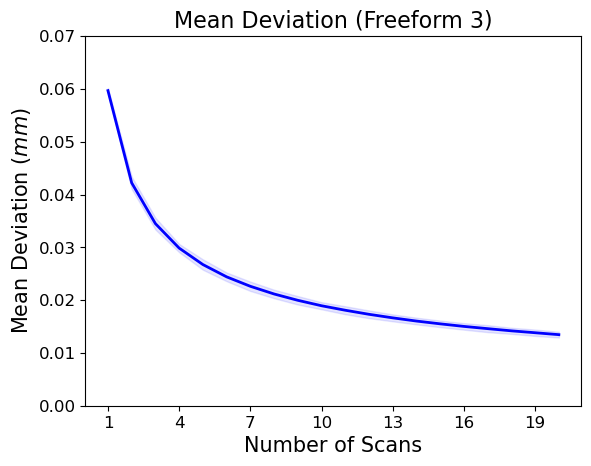

In [57]:
plt.style.use("default")

g = sns.lineplot(x="Number of Scans", y="Mean Deviation", estimator = np.mean, color="blue",
                  data=freeform_2_scan_dev,ci=None, linewidth=2)

# bounds = freeform_2_scan_dev.groupby('Number of Scans')['Mean Deviation'].quantile((0,1)).unstack()

upper_bounds = freeform_2_scan_dev.groupby('Number of Scans')['Mean Deviation'].mean() + 2* freeform_2_scan_dev.groupby('Number of Scans')['Mean Deviation'].std()
lower_bounds = freeform_2_scan_dev.groupby('Number of Scans')['Mean Deviation'].mean() - 2* freeform_2_scan_dev.groupby('Number of Scans')['Mean Deviation'].std()

g.fill_between(x=bounds.index,y1=upper_bounds,y2=lower_bounds,alpha=0.1, color="blue")

plt.title('Mean Deviation (Freeform 3)',fontsize=16)

plt.xticks(np.arange(1, 21, step=3), fontsize=12)
plt.yticks(np.arange(0, 0.07, step=0.01), fontsize=12)

plt.xlabel("Number of Scans", fontsize=15)
plt.ylabel("Mean Deviation ($mm$)", fontsize=15)

plt.savefig("Mean Deviation Plot (Freeform 3).png", dpi=600)